# 이진분류 (binary classification)
---
- 당뇨병 셋

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

## 데이터 준비

In [2]:
#!gdown https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

In [3]:
diabetes = pd.read_csv("/content/diabetes.csv")
diabetes.shape

(768, 9)

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## 데이터 분할

In [7]:
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


속성이 8개이므로 모델 생성시 input이 8개이어야함

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2022)
X_train.shape, X_test.shape

((614, 8), (154, 8))

## 정규화

트리 외에는 정규화를 하는 것이 좋다

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values
y_test = y_test.values

## 모델

In [31]:
def bulid_model(): 
  loss = tf.keras.losses.binary_crossentropy
  adam = tf.keras.optimizers.Adam(learning_rate=0.001)

  model = keras.Sequential([
      layers.Dense(units=64, activation='relu', input_shape=(8,)),
      layers.Dense(units=8, activation='relu'),
      layers.Dense(units=1, activation='sigmoid') 
      # Outcome가 0, 1중 하나이므로 2진분류로 1
      # 마지막에 sigmoid로 사용해야 분류로 인식 가능
  ])

  model.compile(
      optimizer = adam,
      loss = loss,
      metrics = ['accuracy']
  )


  return model

In [32]:
model = bulid_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                576       
                                                                 
 dense_9 (Dense)             (None, 8)                 520       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [24]:
loss = tf.keras.losses.binary_crossentropy
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer = adam,
    loss = loss,
    metrics = ['accuracy']
)

In [1]:
y_train

NameError: ignored

In [33]:
EPOCHS = 100
BATCH_SIZE = 32

history = model.fit(X_train, y_train,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/100
16/16 [==============================] - 1s 11ms/step - loss: 0.6443 - accuracy: 0.6864 - val_loss: 0.6091 - val_accuracy: 0.7073
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6043 - accuracy: 0.7312 - val_loss: 0.5740 - val_accuracy: 0.7480
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5674 - accuracy: 0.7475 - val_loss: 0.5362 - val_accuracy: 0.7561
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7597 - val_loss: 0.5048 - val_accuracy: 0.7642
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.7597 - val_loss: 0.4834 - val_accuracy: 0.7967
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.7658 - val_loss: 0.4721 - val_accuracy: 0.7886
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4769 - accuracy: 0.7678 - val_loss: 0.4614 - val_accuracy: 0.7724
Epoch 8/100


In [34]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

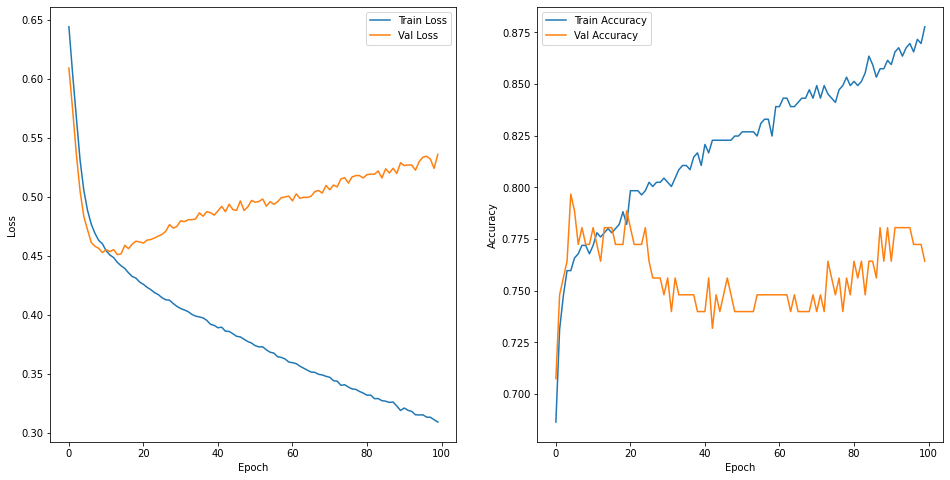

In [35]:
plot_history(history)

In [38]:
model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8550


[0.3514879643917084, 0.8550488352775574]

In [39]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7403


[0.5269965529441833, 0.7402597665786743]

In [40]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [46]:
y_pred = y_pred.flatten() # 1차원으로 변경

y_pred = (y_pred > 0.5).astype(int)

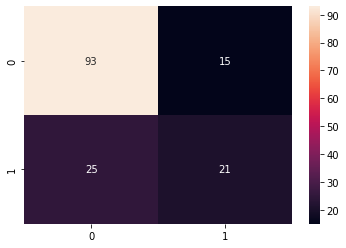

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True)